# Task 2 - Dimensionality Reduction (33 points)

**Task Definition:** A video game company has been working on creating quests for their new video game, but they did not document their decisions well and cannot tell  how many different quests they agreed on. They ask you to look into the data to find out how many different types of quests they created. For this you need to use different dimensionality reduction techniques.

**Input:** The provided input file (`quest_data.txt`) contains the data about the quests. Each line in the file corresponds to a quest and has the following features:

- Estimated length (minutes)
- Number of NPCs to interact with
- Number of resources to collect
- Number of special items the user could find
- Experience points to earn
- Coordinates of the NPC giving the quest (X, Y)

In [38]:
# TODO: uncomment the packages you used, please do not import additional non-native packages
# you may change the imports to the following format: from [package] import [class, method, etc.]

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import scipy
import seaborn as sns

## 2.1 Getting to know the data (6 points)

**Task:** Load the dataset to a pandas DataFrame and display the pairwise relationship of the features using seaborn. (3 points)

Index(['LengthMin', 'NumNPCs', 'NumResources', 'SpecItems', 'EXP', 'CoordsX',
       'CoordsY'],
      dtype='object')


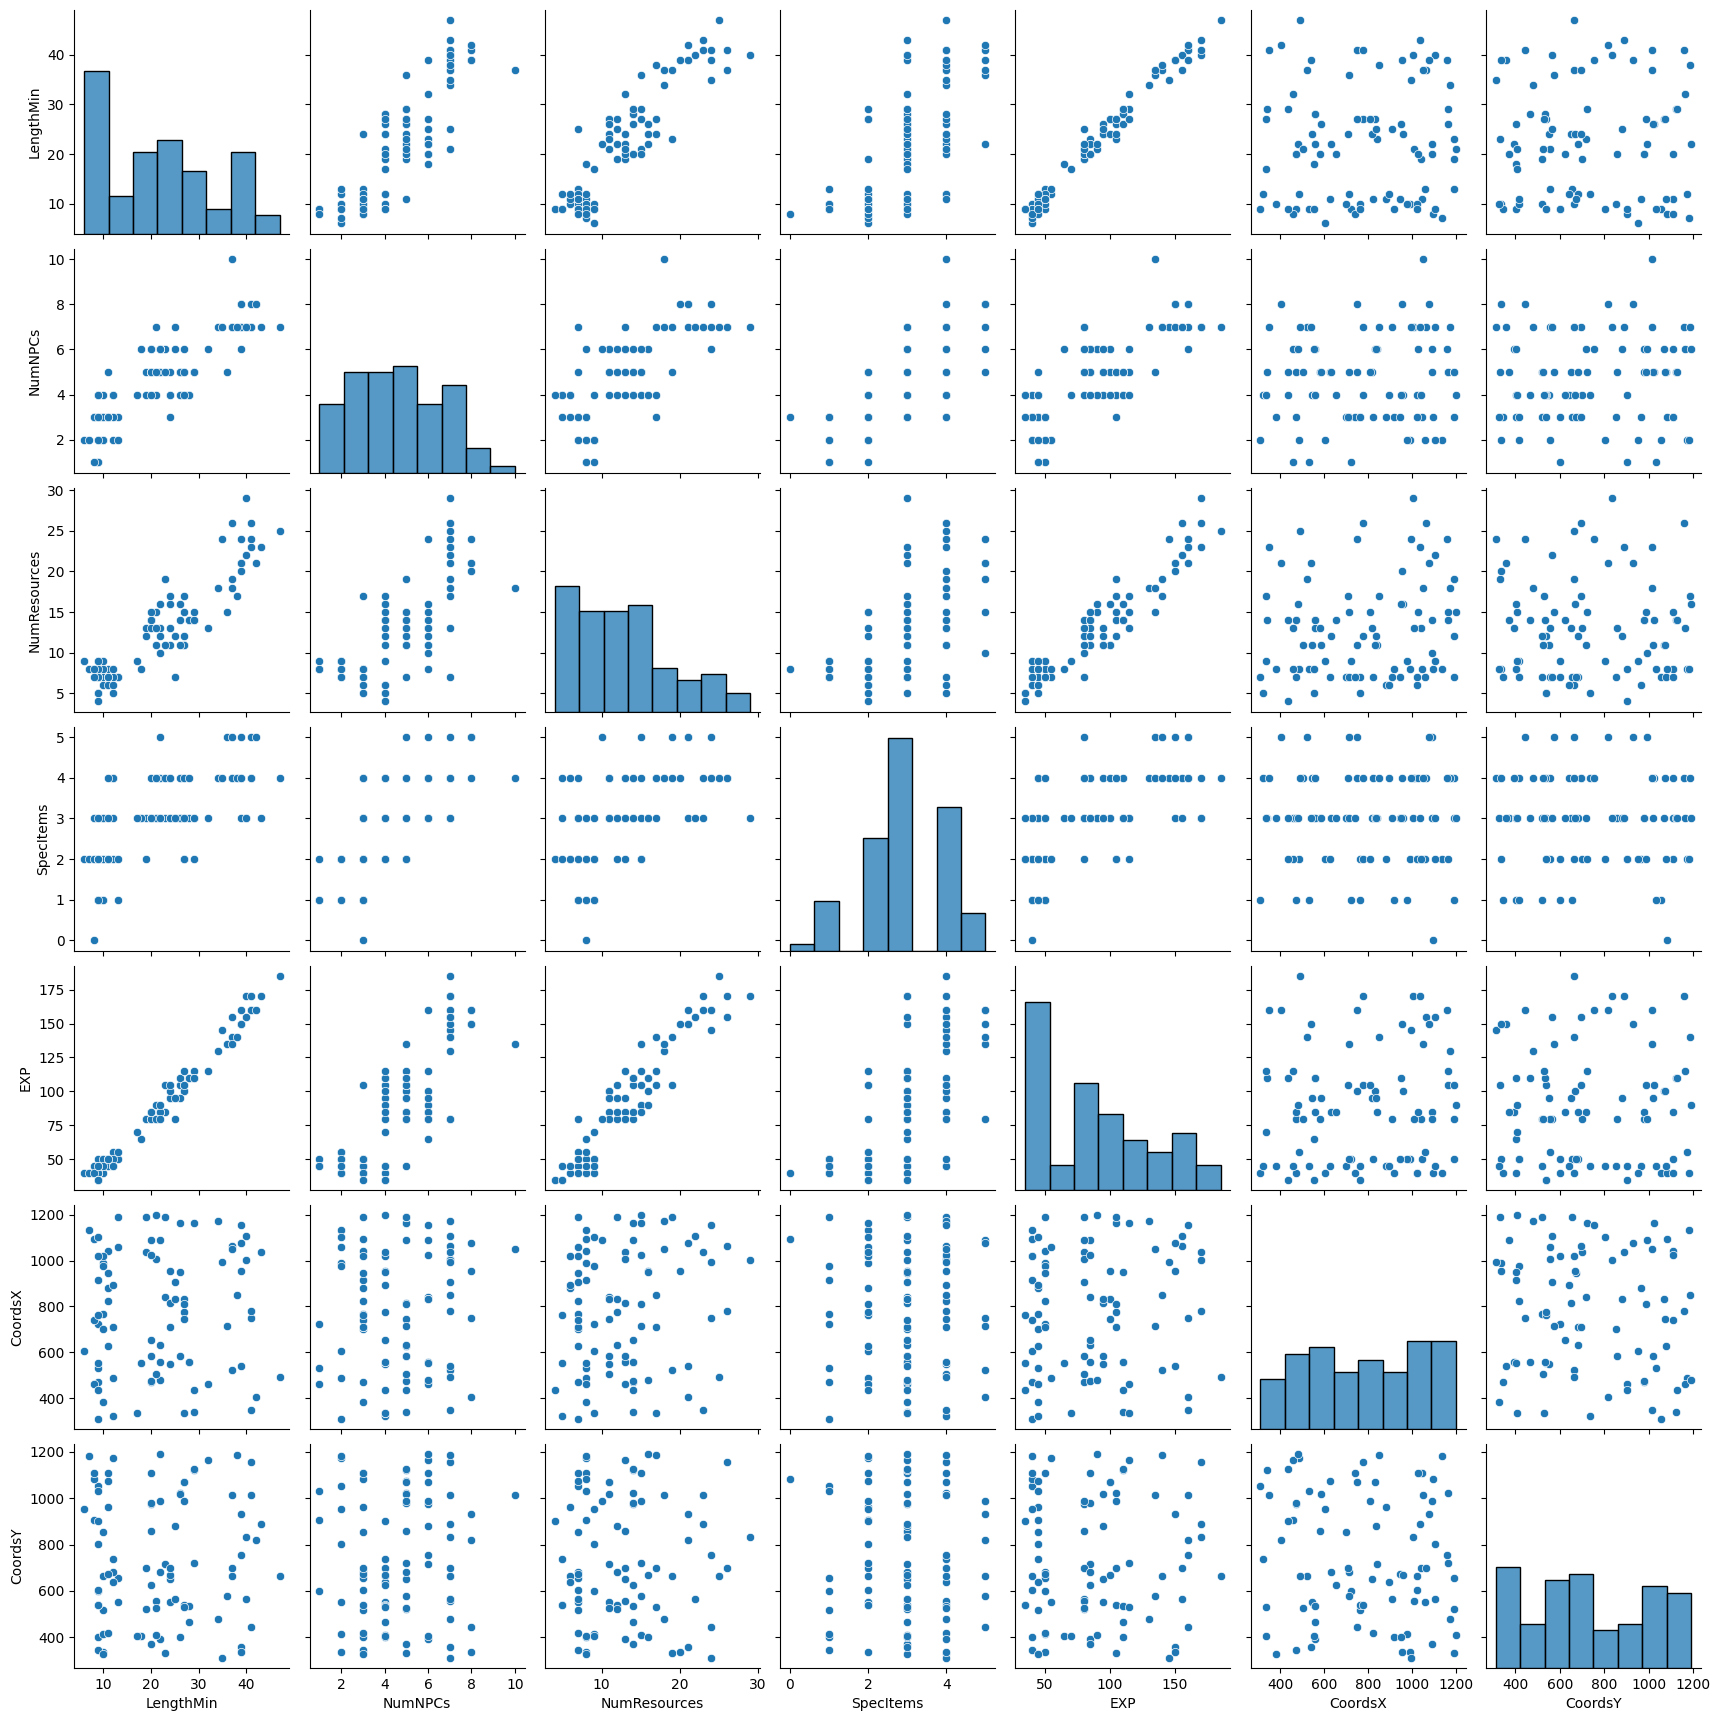

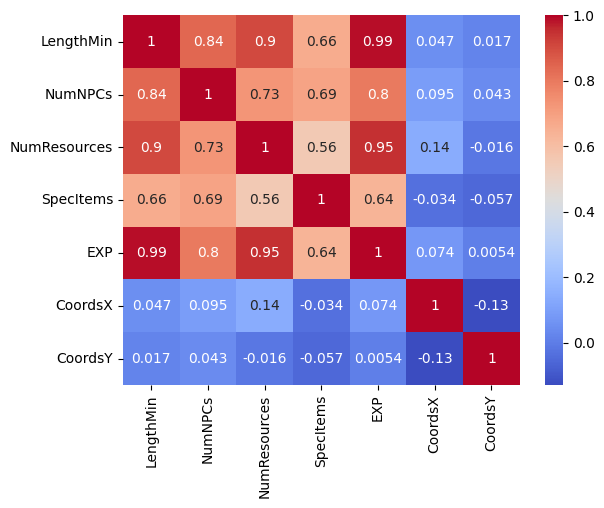

In [39]:
data = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\FDAAssignment\fda_lab2_ss23\data\quest_data.csv', delimiter=',')
print(data.columns)

#  https://seaborn.pydata.org/generated/seaborn.pairplot.html
# Visualize the pairwise relationships between different variables 
sns.pairplot(data, vars=['LengthMin', 'NumNPCs', 'NumResources', 'SpecItems', 'EXP','CoordsX','CoordsY'])
plt.show()

# Visualize the correlation matrix and visualize it using a heatmap
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


**Report:** Based on the pairplot answer the following questions: (3 points)

-- Do you recognize any data distribution? (e.g. Gaussian, uniform)

I recognize Gaussian distributions for SpecItems feature.
Uniform Distribution for NumNPCs, CoordsX, and CoordsY.
Positive skewed Distribution for NumResources, EXP, NumNPCs.


-- Are there any correlated feature pairs?
According to the  heatmap the higher correlation have features on top left.



-- Is selecting some features sufficient for finding (well separable) clusters in the data?
It may be sufficient for finding well-separable clusters in the data.However,it depends on the various factors like relevance, clustering algorithm, discriminative power of feature, dimensionality of feature space.


## 2.2 Preprocessing and PCA (21 points)

**Task:** In this task you will experience that preprocessing the dataset before using PCA could lead to results better for clustering. Create the following versions:

1) Apply PCA on the original dataset without preprocessing. (2 points)
2) Scale the data using an appropriate scaler and apply PCA on the scaled data. (4 points)
3) Remove noise features from the data (e.g. features with uniform distribution), scale the reduced dataset and apply PCA on the scaled data. (6 points)

For each version create a scatter plot using the principal components and print out the explained variance. (3 points)

**Hint:** You can use the PCA implementation from sklearn.decomposition and an appropriate scaler from sklearn.preprocessing.

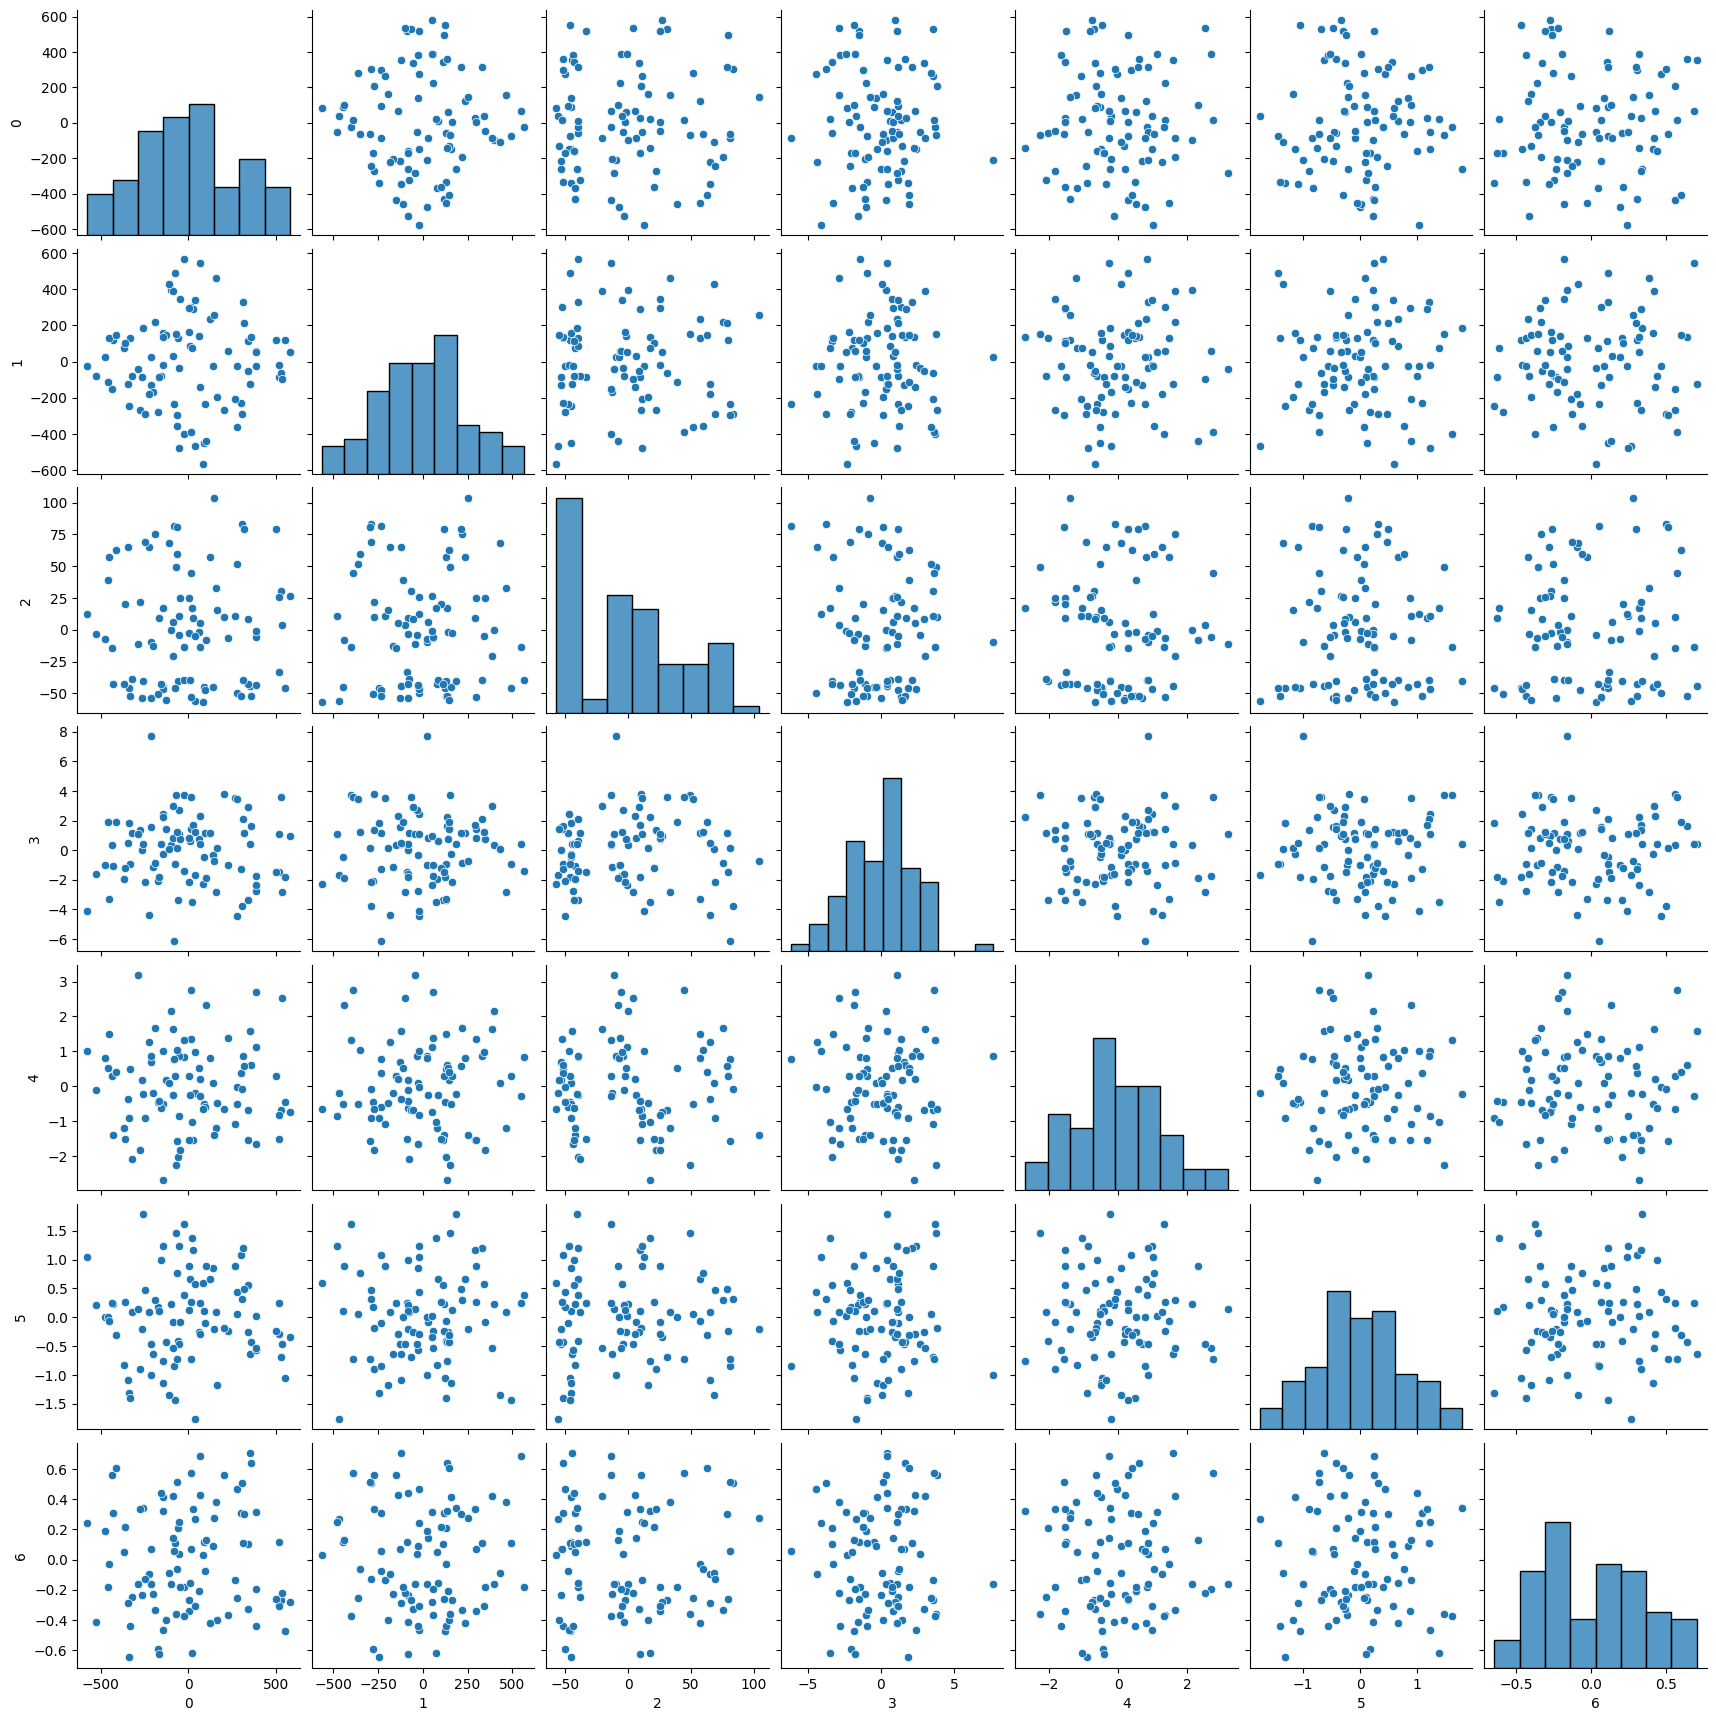

In [40]:
# 1) Apply PCA on the original dataset without preprocessing. (2 points)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

data = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\FDAAssignment\fda_lab2_ss23\data\quest_data.csv')

# Apply PCA on the original dataset
pca = PCA()
fitted_data = pca.fit_transform(data)

# Visualize pairwise relationships between different variables
sns.pairplot(pd.DataFrame(fitted_data), vars=[0, 1, 2, 3, 4, 5, 6])
plt.show()
 

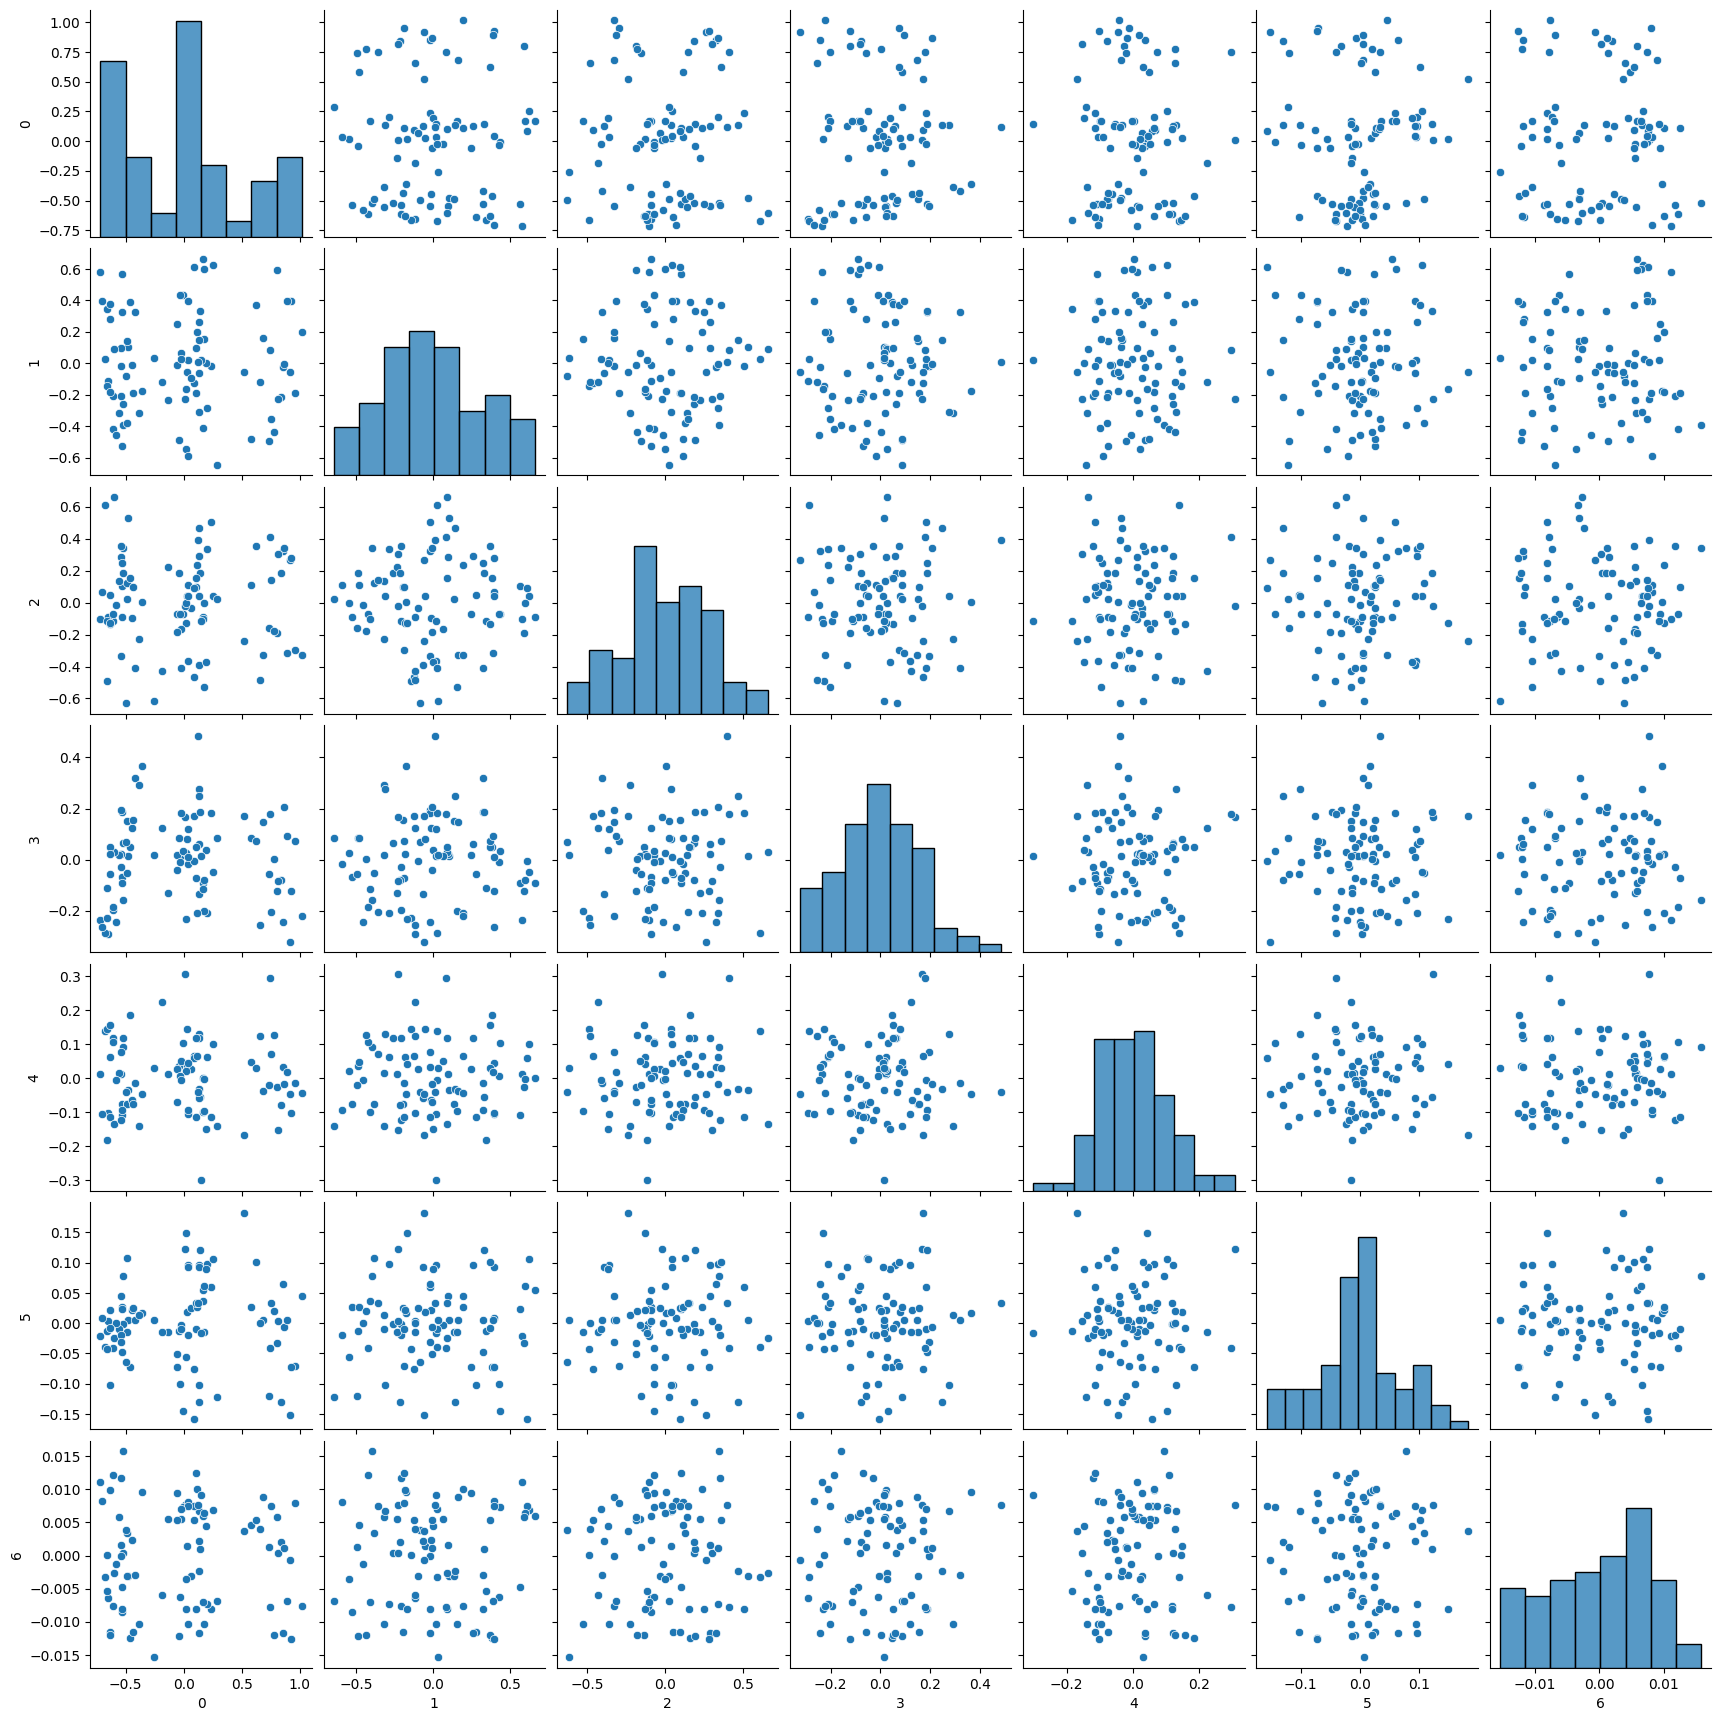

In [87]:
# 2) Scale the data using an appropriate scaler and apply PCA on the scaled data. (4 points)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\FDAAssignment\fda_lab2_ss23\data\quest_data.csv')

# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Apply PCA on the scaled data
pca = PCA()
transformed_data = pca.fit_transform(scaled_data)



# Visualize pairwise relationships between different variables
sns.pairplot(pd.DataFrame(transformed_data), vars=[0, 1, 2, 3, 4, 5, 6])
plt.show()


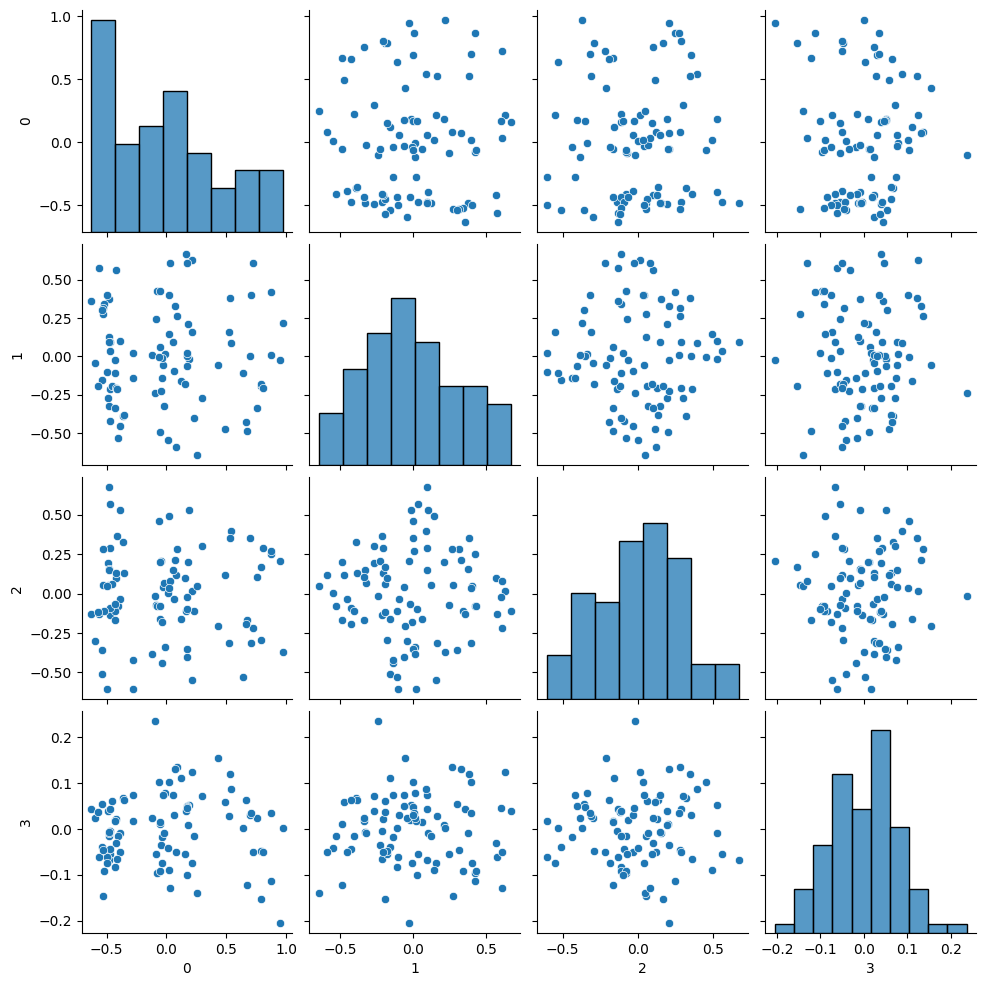

In [91]:

# https://medium.com/data-science-365/principal-component-analysis-pca-with-scikit-learn-1e84a0c731b0
# 3) Remove noise features from the data (e.g. features with uniform distribution), scale the reduced dataset and apply PCA on the scaled data. (6 points)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Read the dataset
data = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\FDAAssignment\fda_lab2_ss23\data\quest_data.csv')

# Remove noise with low variance
var_threshold = 5.0
high_variance = data.columns[data.var() > var_threshold]
reduce_data = data[high_variance]

# Scale the reduced data using MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(reduce_data)

# Apply PCA
pca = PCA()
transformed_scaled_data = pca.fit_transform(scaled_data)

# Visualize pairwise relationships between different variables
sns.pairplot(pd.DataFrame(transformed_scaled_data), vars=[0, 1, 2, 3,])
plt.show()




**Report:** Based on your experiments and knowledge from the lectures, explain why you get better or worse results when scaling and removing noise features from this dataset. (6 points)

**Hint:** You could consider the general goal of PCA, the explained variance, or compare the variance of the features (e.g. with the var() method of pandas DataFrames).

    Scaling data before applying PCA ensures that all features are on same scale.This is crucial for PCA as it is based on variance. Different scale of data can lead to biased results as larger variance dominates the principal component. 

    Noise data does not contribute much to the variance in data therefore by removing noise features the dimensionality of dataset reduces improving PCA performance. As the plot for 3rd Task shows that noise removal does  effect PCA performance. For 2nd and last task MinMaxScaler is used which is better choice comparing to StandardScaler. On the 3rd task the data plot is better distributed so I can recognize Gaussian distribution.


## 2.3 Non-Negative Matrix Factorization (6 points)

**Task:** Apply NMF on the data based on your experience from Task 2.2. Create a scatter plot of the solutions. (6 points)

**Hint:** You can use the NMF implementation from sklearn.decomposition. What properties need the dataset have to apply NMF on it? Transform the data by using an appropriate scaler from sklearn.preprocessing.

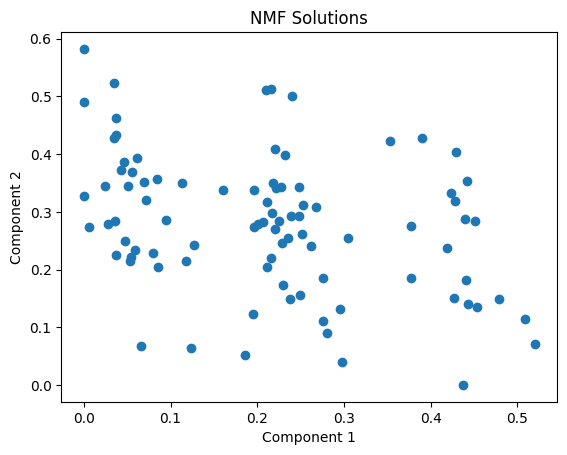

In [96]:
#https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\FDAAssignment\fda_lab2_ss23\data\quest_data.csv')

# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Apply NMF on the scaled data
nmf = NMF(n_components=2)
nmf_data = nmf.fit_transform(scaled_data)

# Scatter plot of solutions
plt.scatter(nmf_data[:, 0], nmf_data[:, 1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('NMF Solutions')
plt.show()


    What properties need the dataset have to apply NMF on it?

    Data set should have properties such as non-negative values, assumption that the data can be expressed as a linear combination of components, Dimensinality Reduction, Structure of patterns.